In [1]:
!git clone https://github.com/Attez1ve/PyTorch-First-Attez1ve.git

Cloning into 'PyTorch-First-Attez1ve'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 10 (delta 1), pack-reused 0
Receiving objects: 100% (10/10), done.
Resolving deltas: 100% (1/1), done.


In [4]:
%cd PyTorch-First-Attez1ve

/content/PyTorch-First-Attez1ve


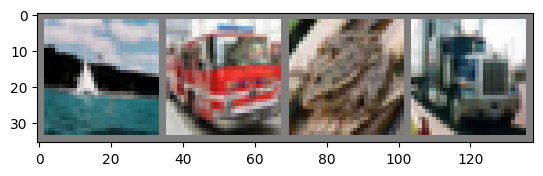

ship  truck frog  truck


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from data_loading import trainloader, batch_size, classes
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

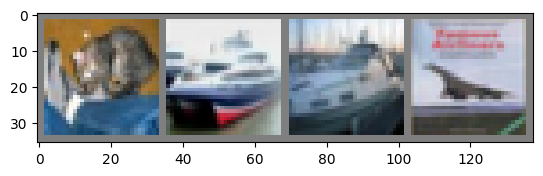

GroundTruth:  cat   ship  ship  plane


In [8]:
from data_loading import testloader
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [9]:
import learning

[1,  2000] loss: 2.242
[1,  4000] loss: 1.956
[1,  6000] loss: 1.743
[1,  8000] loss: 1.638
[1, 10000] loss: 1.556
[1, 12000] loss: 1.511
[2,  2000] loss: 1.438
[2,  4000] loss: 1.404
[2,  6000] loss: 1.372
[2,  8000] loss: 1.387
[2, 10000] loss: 1.346
[2, 12000] loss: 1.304
Finished Training


In [10]:
from learning import PATH
from model import Net
import torch
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [11]:
outputs = net(images)

In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  plane


In [16]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 60.2 %
Accuracy for class: car   is 46.3 %
Accuracy for class: bird  is 32.5 %
Accuracy for class: cat   is 15.5 %
Accuracy for class: deer  is 47.3 %
Accuracy for class: dog   is 58.5 %
Accuracy for class: frog  is 73.7 %
Accuracy for class: horse is 59.1 %
Accuracy for class: ship  is 66.1 %
Accuracy for class: truck is 71.1 %


In [14]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [15]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)